# Supermart Grocery Sales Analysis

### Import libraries And Load the Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
df = pd.read_csv('Supermart Grocery Sales.csv') 


### Explore the Data (EDA - Exploratory Data Analysis)

In [6]:
# Display first few row
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [7]:
#Check basic info and missing values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
# Check descriptive statistics
df.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


### Data Cleaning

In [11]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [12]:
# Change datatype of 'Order Date'from object to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

In [13]:
#Changed Datatype 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Customer Name  9994 non-null   object        
 2   Category       9994 non-null   object        
 3   Sub Category   9994 non-null   object        
 4   City           9994 non-null   object        
 5   Order Date     4042 non-null   datetime64[ns]
 6   Region         9994 non-null   object        
 7   Sales          9994 non-null   int64         
 8   Discount       9994 non-null   float64       
 9   Profit         9994 non-null   float64       
 10  State          9994 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 859.0+ KB


### feature Engineering

In [15]:
#Create new columns
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year

df['Profit Margin'] = df.apply(lambda row: row['Profit'] / row['Sales'] if row['Sales'] != 0 else 0, axis=1)
df['Net Sales'] = df['Sales'] * (1 - df['Discount'])
df['Total Cost'] = df['Sales'] - df['Profit']
df['Actual Profit']=df['Net Sales']-df['Total Cost']

In [16]:
df[['Sales', 'Profit','Discount', 'Profit Margin', 'Total Cost','Net Sales','Actual Profit']].head()


,Sales,Profit,Discount,Profit Margin,Total Cost,Net Sales,Actual Profit
0,1254,401.28,0.12,0.32,852.72,1103.52,250.80
1,749,149.80,0.18,0.20,599.20,614.18,14.98
2,2360,165.20,0.21,0.07,2194.80,1864.40,-330.40
3,896,89.60,0.25,0.10,806.40,672.00,-134.40
4,2355,918.45,0.26,0.39,1436.55,1742.70,306.15


###  Data Analysis

In [18]:
#Top-Customers
df.groupby('Customer Name')['Net Sales'].sum().sort_values(ascending=False).head(10)

Customer Name
Krithika    261143.83
Amrish      257223.89
Arutra      253337.89
Verma       252427.66
Vidya       250328.11
Suresh      247061.26
Vinne       245855.20
Shah        245348.25
Adavan      244511.11
Surya       242914.49
Name: Net Sales, dtype: float64

In [19]:
# Top 10 selling Category
df.groupby('Category')['Net Sales'].sum().sort_values(ascending=False).head(10)

Category
Eggs, Meat & Fish    1751440.33
Snacks               1741607.19
Bakery               1636643.34
Food Grains          1631590.64
Fruits & Veggies     1619973.59
Beverages            1606035.30
Oil & Masala         1579567.06
Name: Net Sales, dtype: float64

In [20]:
# Top 10 selling Sub Category
df.groupby('Sub Category')['Net Sales'].sum().sort_values(ascending=False).head(10)

Sub Category
Health Drinks    808867.95
Soft Drinks      797167.35
Cookies          600129.03
Breads & Buns    574084.00
Noodles          572719.62
Chocolates       568758.54
Masalas          542598.92
Cakes            531500.70
Biscuits         531058.64
Spices           523520.97
Name: Net Sales, dtype: float64

In [21]:
# Top 10 selling City
df.groupby('City')['Net Sales'].sum().sort_values(ascending=False).head(10)

City
Kanyakumari    548739.22
Bodi           522056.81
Vellore        519827.06
Tirunelveli    510885.56
Salem          510188.11
Pudukottai     507550.71
Perambalur     506201.58
Karur          497045.12
Tenkasi        495843.29
Coimbatore     495294.59
Name: Net Sales, dtype: float64

In [22]:
# Top 10 selling Region
df.groupby('Region')['Net Sales'].sum().sort_values(ascending=False).head(10)

Region
West       3719836.08
East       3282291.46
Central    2675868.35
South      1887758.04
North         1103.52
Name: Net Sales, dtype: float64

In [23]:
# Sales trend over time
monthly_sales = df.groupby(['Year', 'Month'])['Net Sales'].sum().sort_values(ascending=False)
monthly_sales.head(12)

Year    Month
2018.0  12.0     285652.99
        9.0      244704.31
        11.0     233936.99
2017.0  9.0      220216.54
        12.0     210489.71
        11.0     190906.70
2016.0  12.0     169370.72
2015.0  11.0     166537.30
2018.0  10.0     137570.46
2016.0  11.0     128552.46
2018.0  6.0      115423.44
2016.0  9.0      113224.55
Name: Net Sales, dtype: float64

In [24]:
#Profit by category
df.groupby('Category')['Actual Profit'].sum().sort_values(ascending=False).head(10)

Category
Snacks               72240.04
Bakery               52883.40
Eggs, Meat & Fish    51396.55
Fruits & Veggies     49646.97
Beverages            46328.06
Food Grains          45481.28
Oil & Masala         39020.35
Name: Actual Profit, dtype: float64

In [25]:
#Profit by sub category
df.groupby('Sub Category')['Actual Profit'].sum().sort_values(ascending=False).head(10)

Sub Category
Noodles           30970.43
Health Drinks     24898.74
Cookies           22559.73
Breads & Buns     22262.98
Soft Drinks       21429.32
Chocolates        18709.88
Fish              17256.54
Biscuits          16333.26
Organic Fruits    16182.77
Eggs              15356.27
Name: Actual Profit, dtype: float64

In [26]:
#Profit by region
df.groupby('Region')['Actual Profit'].sum().sort_values(ascending=False)

Region
West       113097.69
East       108269.04
South       70859.93
Central     64519.19
North         250.80
Name: Actual Profit, dtype: float64

In [27]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Month,Year,Profit Margin,Net Sales,Total Cost,Actual Profit
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,11.0,2017.0,0.32,1103.52,852.72,250.80
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,11.0,2017.0,0.20,614.18,599.20,14.98
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,6.0,2017.0,0.07,1864.40,2194.80,-330.40
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,10.0,2016.0,0.10,672.00,806.40,-134.40
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,10.0,2016.0,0.39,1742.70,1436.55,306.15


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Customer Name  9994 non-null   object        
 2   Category       9994 non-null   object        
 3   Sub Category   9994 non-null   object        
 4   City           9994 non-null   object        
 5   Order Date     4042 non-null   datetime64[ns]
 6   Region         9994 non-null   object        
 7   Sales          9994 non-null   int64         
 8   Discount       9994 non-null   float64       
 9   Profit         9994 non-null   float64       
 10  State          9994 non-null   object        
 11  Month          4042 non-null   float64       
 12  Year           4042 non-null   float64       
 13  Profit Margin  9994 non-null   float64       
 14  Net Sales      9994 non-null   float64       
 15  Total Cost     9994 n

# Data Visualization

#### Sales and Profit Overview

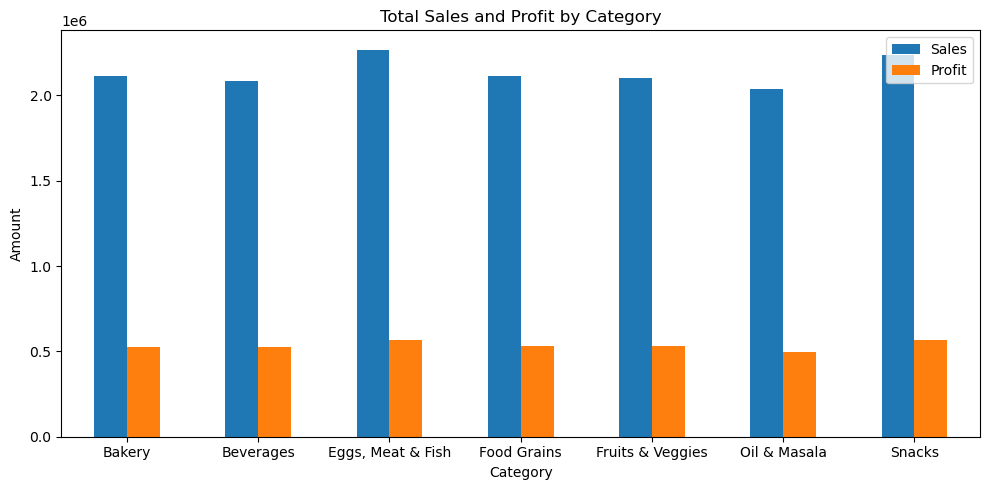

In [31]:
# Total Sales & Profit by Category
category_data = df.groupby('Category')[['Sales', 'Profit']].sum().reset_index()
category_data.plot(kind='bar', x='Category', y=['Sales', 'Profit'], figsize=(10, 5))
plt.title('Total Sales and Profit by Category')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


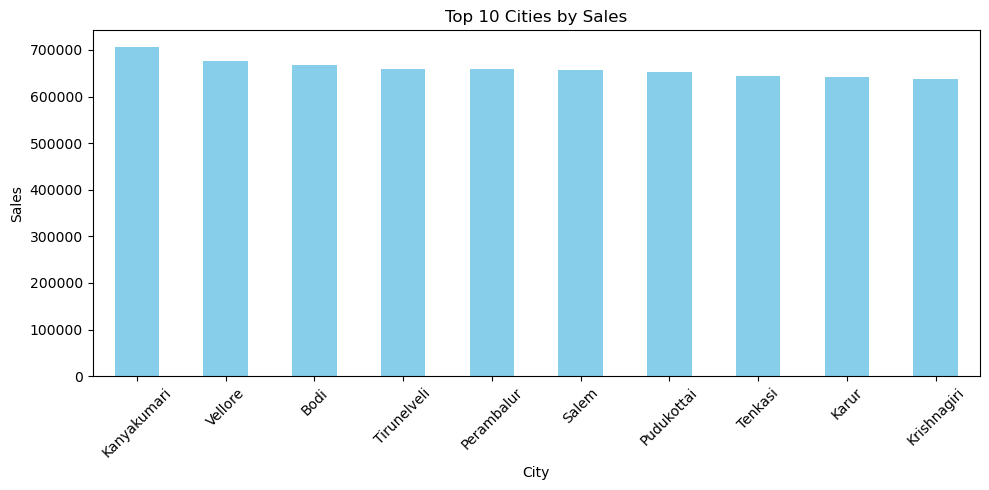

In [32]:
#  Top 10 Cities by Sales
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)
top_cities.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Top 10 Cities by Sales')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Time-based Analysis

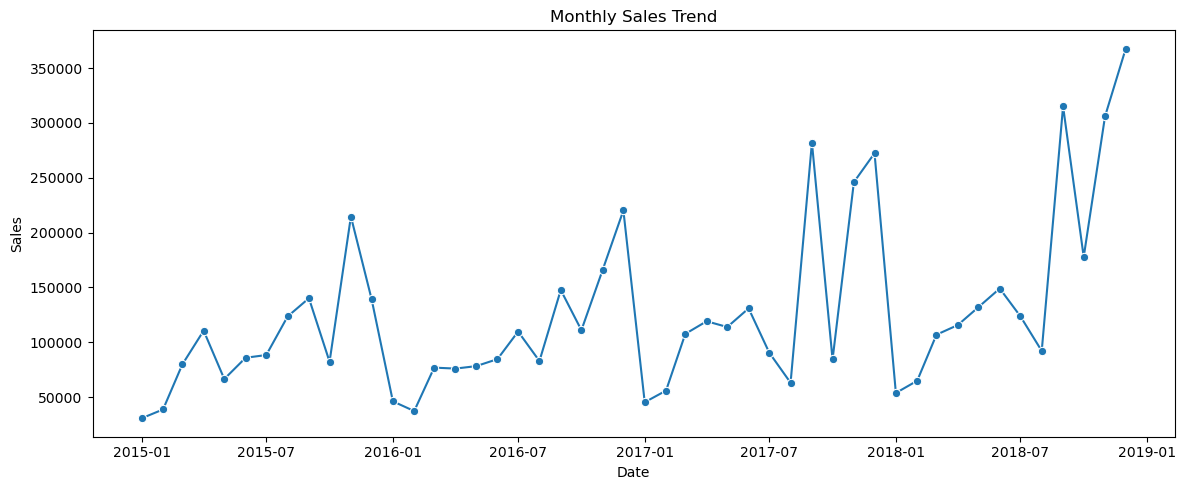

In [34]:
#  Monthly Sales Trend
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))

plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_sales, x='Date', y='Sales', marker='o')
plt.title('Monthly Sales Trend')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.tight_layout()
plt.show()


#### Discount vs Profit Analysis

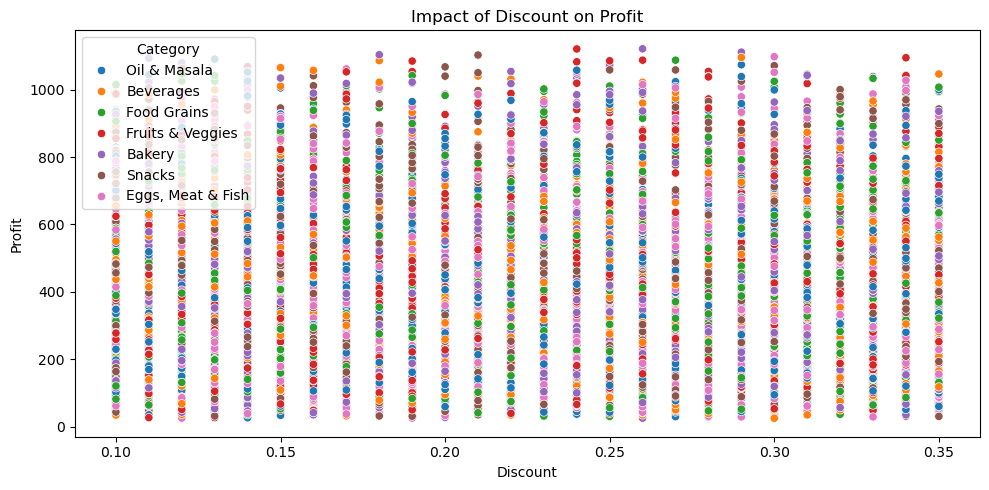

In [36]:
# Scatter Plot: Discount vs Profit
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category')
plt.title('Impact of Discount on Profit')
plt.tight_layout()
plt.show()


####  Region-wise Net Sales and Profit

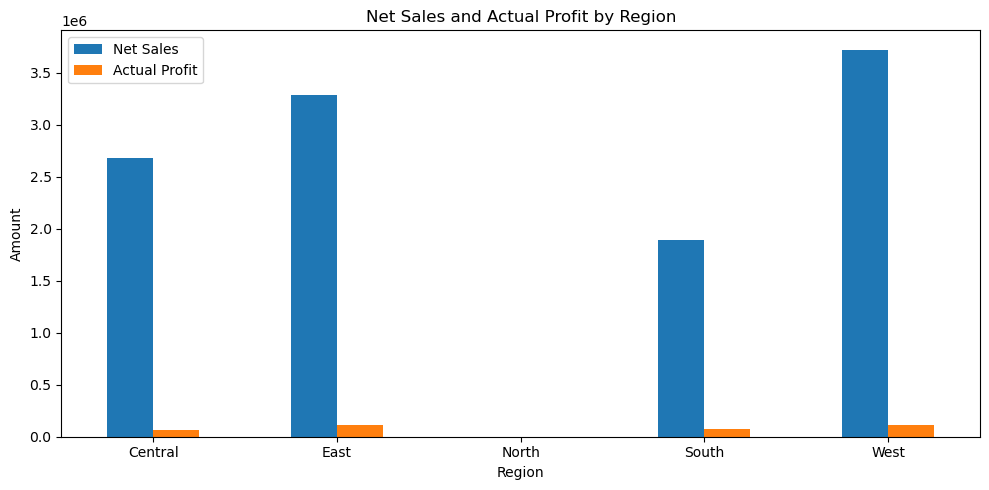

In [38]:

region_data = df.groupby('Region')[['Net Sales', 'Actual Profit']].sum().reset_index()
region_data.plot(kind='bar', x='Region', y=['Net Sales', 'Actual Profit'], figsize=(10, 5))
plt.title('Net Sales and Actual Profit by Region')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


#### Sub-Category Heatmap (Sales vs Profit)

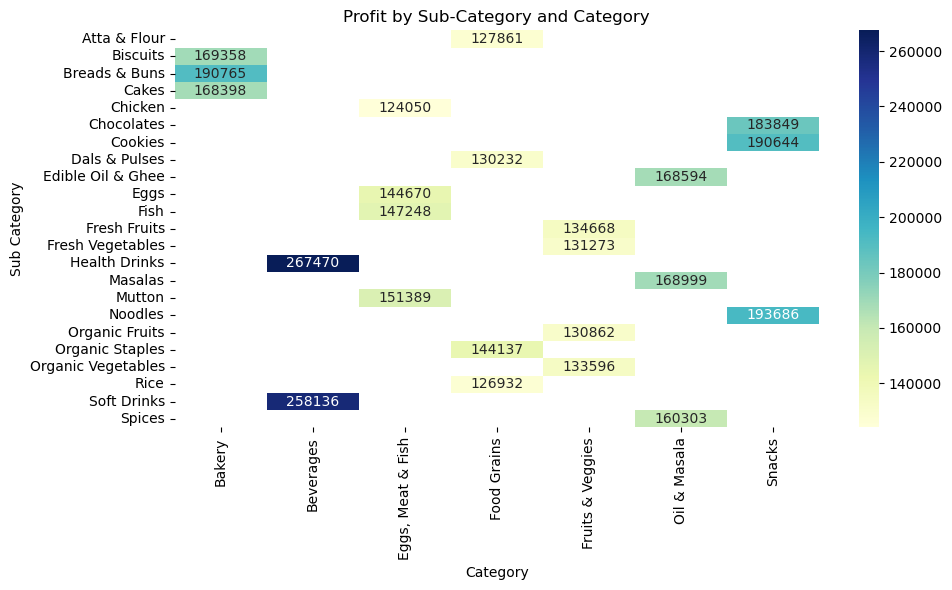

In [40]:
pivot = df.pivot_table(values='Profit', index='Sub Category', columns='Category', aggfunc='sum')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt='.0f')
plt.title('Profit by Sub-Category and Category')
plt.tight_layout()
plt.show()


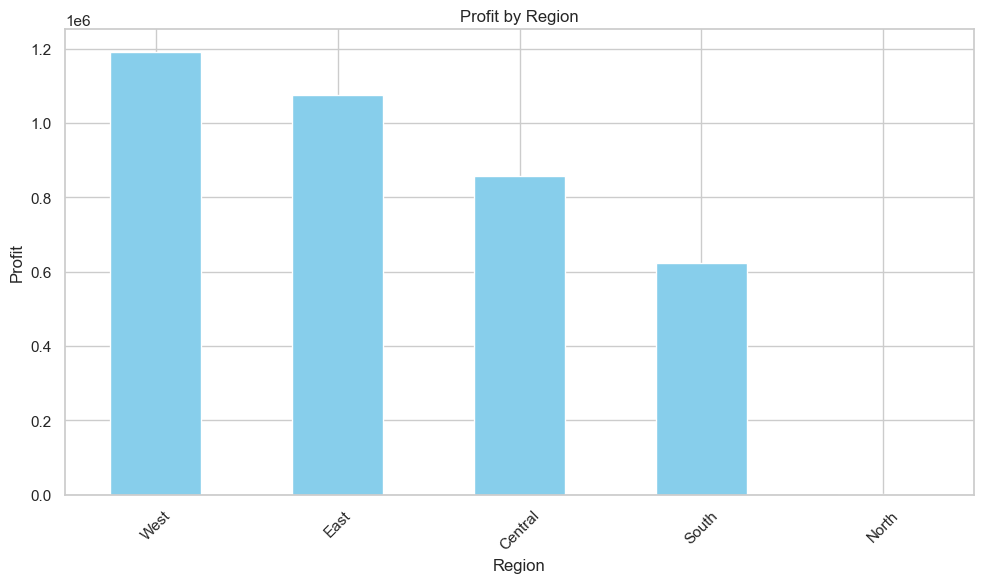

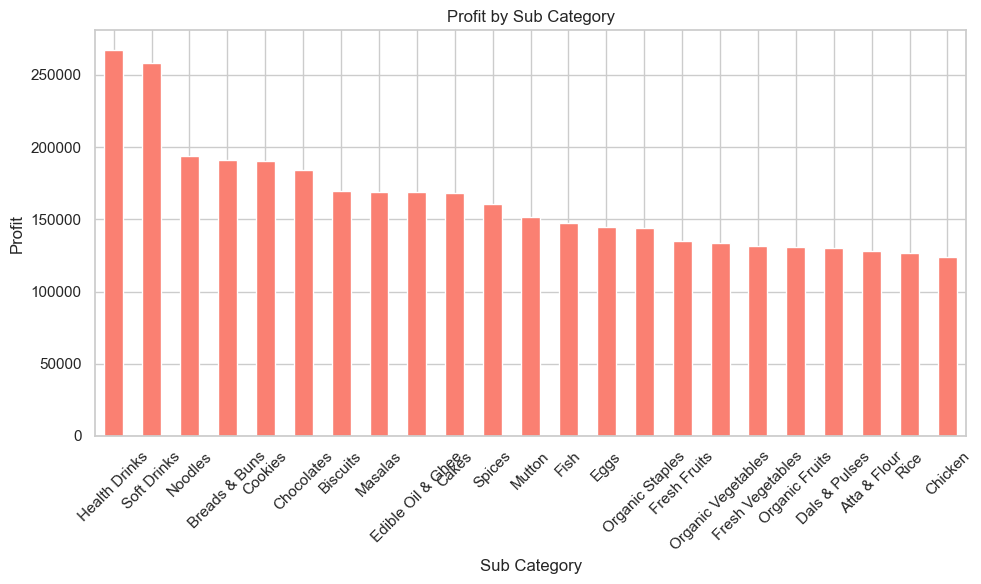

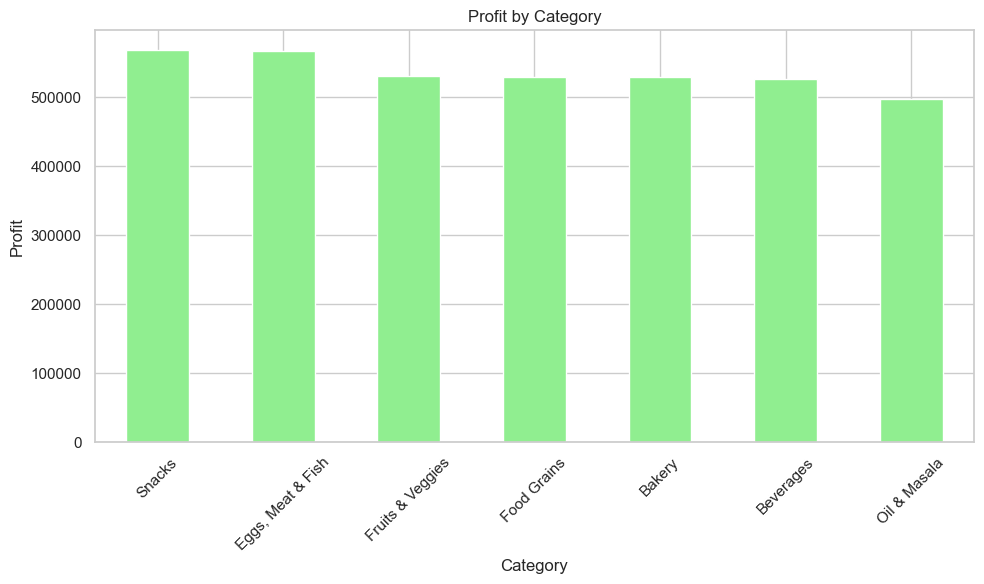

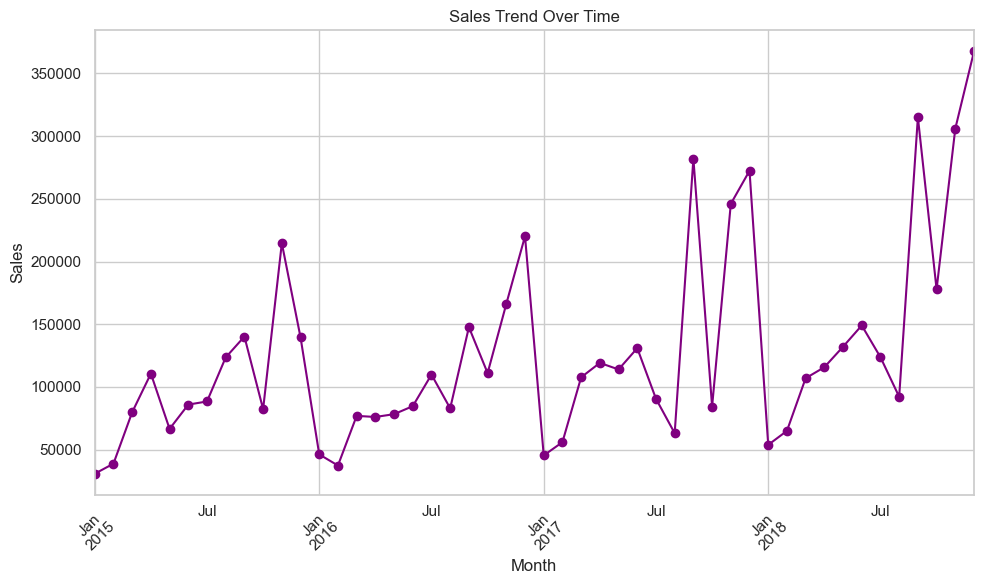

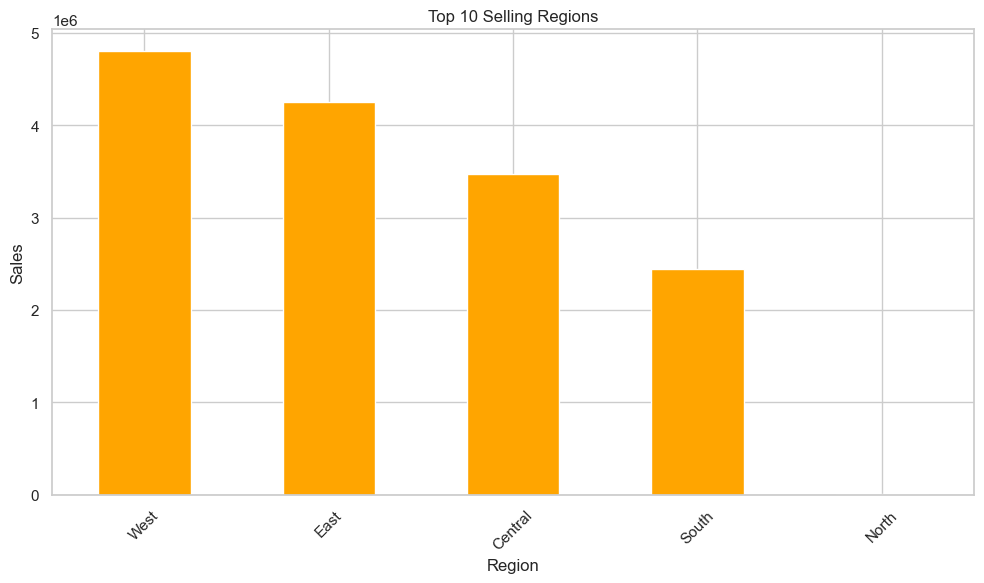

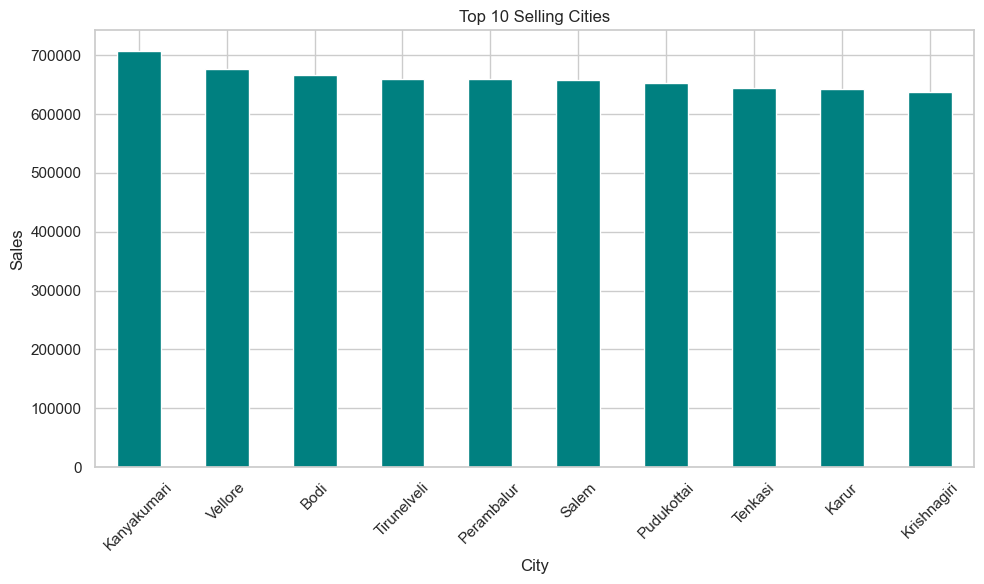

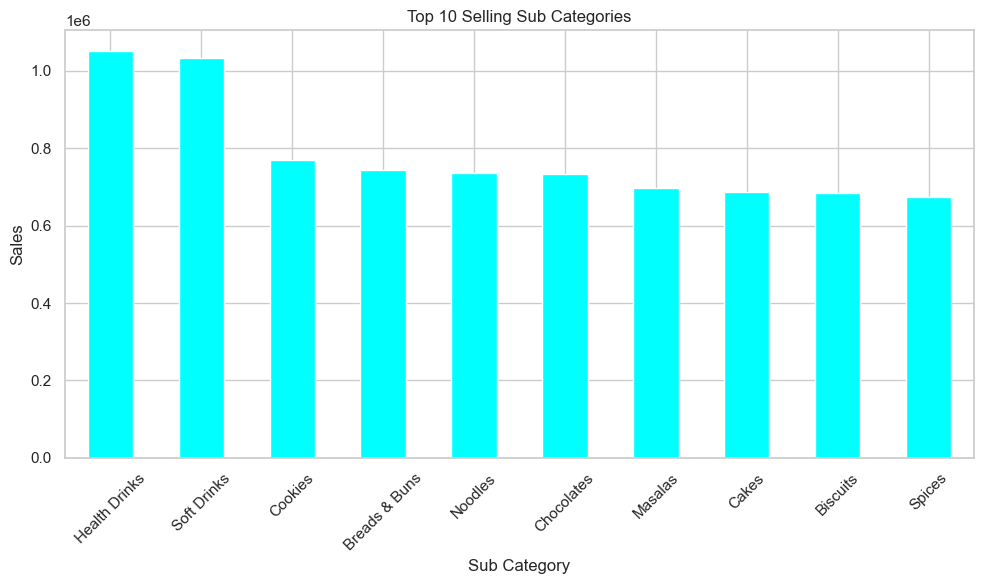

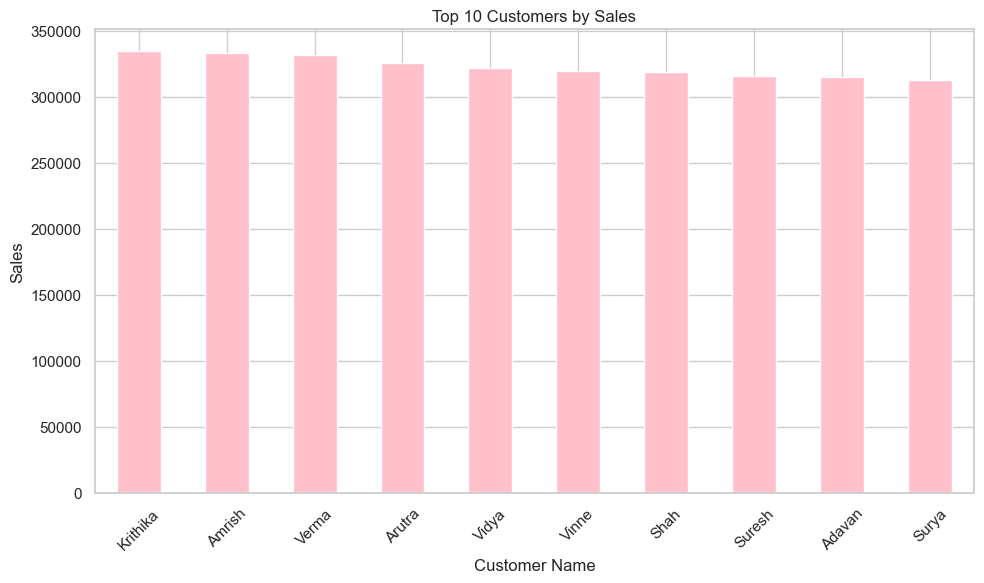

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Supermart Grocery Sales.csv')  # Assuming the file is named 'ipl_stats.csv'

# Set plot style
sns.set(style="whitegrid")

# Profit by Region
plt.figure(figsize=(10, 6))
profit_by_region = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)
profit_by_region.plot(kind='bar', color='skyblue')
plt.title('Profit by Region')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Profit by Sub Category
plt.figure(figsize=(10, 6))
profit_by_sub_category = df.groupby('Sub Category')['Profit'].sum().sort_values(ascending=False)
profit_by_sub_category.plot(kind='bar', color='salmon')
plt.title('Profit by Sub Category')
plt.xlabel('Sub Category')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Profit by Category
plt.figure(figsize=(10, 6))
profit_by_category = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
profit_by_category.plot(kind='bar', color='lightgreen')
plt.title('Profit by Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Sales Trend Over Time
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Month'] = df['Order Date'].dt.to_period('M')
sales_trend = df.groupby('Month')['Sales'].sum()
plt.figure(figsize=(10, 6))
sales_trend.plot(kind='line', marker='o', color='purple')
plt.title('Sales Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 10 Selling Regions
top_10_regions = df.groupby('Region')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_10_regions.plot(kind='bar', color='orange')
plt.title('Top 10 Selling Regions')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 10 Selling Cities
top_10_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_10_cities.plot(kind='bar', color='teal')
plt.title('Top 10 Selling Cities')
plt.xlabel('City')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 10 Selling Sub Categories
top_10_sub_categories = df.groupby('Sub Category')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_10_sub_categories.plot(kind='bar', color='cyan')
plt.title('Top 10 Selling Sub Categories')
plt.xlabel('Sub Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top Customers by Sales
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='pink')
plt.title('Top 10 Customers by Sales')
plt.xlabel('Customer Name')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [42]:
df.to_csv("cleaned_dataset.csv")